In [1]:
import tensorflow as tf 
import keras 
import numpy as np 
import matplotlib.pyplot as plt 
from keras import layers 

we are going to create a 3 layers net for mnist data 

In [2]:
inputs = keras.Input(shape=(784))
layer1 = layers.Dense(64,activation = "relu",name="layer_1")
layer2 = layers.Dense(64,activation = "relu",name="layer_2")
layer3 = layers.Dense(10,name="layer_3")
outputs = layer3(layer2(layer1(inputs)))

In [3]:
#del basic_model

In [4]:
basic_model = keras.Model(inputs=inputs , outputs = outputs , name="basic_model_bulit_by_functional_API")

In [5]:
basic_model.summary()

Model: "basic_model_bulit_by_functional_API"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 layer_1 (Dense)             (None, 64)                50240     
                                                                 
 layer_2 (Dense)             (None, 64)                4160      
                                                                 
 layer_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


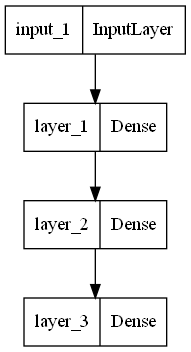

In [6]:
keras.utils.plot_model(basic_model)

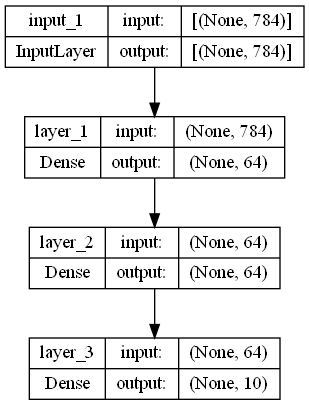

In [8]:
keras.utils.plot_model(basic_model,show_shapes=True)

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

basic_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = basic_model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = basic_model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2


750/750 [==============================] - 4s 4ms/step - loss: 0.3446 - accuracy: 0.9040 - val_loss: 0.1883 - val_accuracy: 0.9454
Epoch 2/2
750/750 [==============================] - 3s 3ms/step - loss: 0.1643 - accuracy: 0.9516 - val_loss: 0.1368 - val_accuracy: 0.9602
313/313 - 1s - loss: 0.1340 - accuracy: 0.9578 - 606ms/epoch - 2ms/step
Test loss: 0.13403324782848358
Test accuracy: 0.9577999711036682


In [9]:
basic_model.save("first_model_that_i_have_saved")

INFO:tensorflow:Assets written to: first_model_that_i_have_saved\assets


INFO:tensorflow:Assets written to: first_model_that_i_have_saved\assets


In [10]:
loaded_basic_model = keras.models.load_model("first_model_that_i_have_saved")

In [11]:
loaded_basic_model.summary()

Model: "basic_model_bulit_by_functional_API"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 layer_1 (Dense)             (None, 64)                50240     
                                                                 
 layer_2 (Dense)             (None, 64)                4160      
                                                                 
 layer_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
